# Dimensionality reduction

### single line explanation:

$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        
                                                  ???

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

plt.rc('font', **{'size':18})
np.set_printoptions(suppress=True)

# Example 1. Cameras


![](https://downloader.disk.yandex.ru/preview/c30af34bc0b0df1954f46c078e9ea6b957d8f7d91ab7718f340772ac27e8c69d/5f7480bd/ni8R4XFI7VXNAaXgVS9LS__u67eNfwyKuWtVOGefoDkHAC2FTqxLEwKtTFPhwRrzdqV_ufs_NeVpjB9Z3N2J5w==?uid=0&filename=Screenshot+from+2020-09-30+11-57-11.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&owner_uid=159868851&size=2048x2048)

original paper (PCA tutorial) https://arxiv.org/pdf/1404.1100.pdf (highly recommended for reading)

In [2]:
df = pd.read_csv('camera_points.csv')

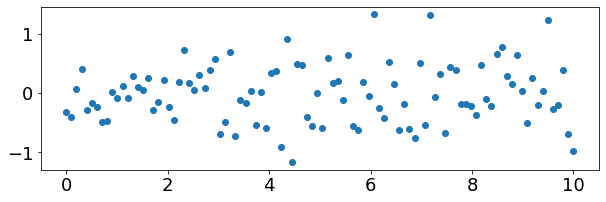

In [3]:
plt.figure(figsize=(10,3))
plt.scatter(df['X'], df['Y']);

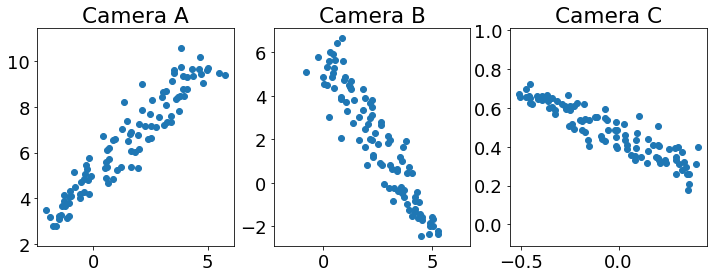

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))

ax[0].scatter(df['XA'], df['YA'])
ax[1].scatter(df['XB'], df['YB'])
ax[2].scatter(df['XC'], df['YC'])
for i, camera in zip(range(3), ['A', 'B', 'C']):
    ax[i].axis('equal');
    ax[i].set_title(f'Camera {camera}')

In [5]:
df.drop(['X', 'Y'], axis=1, inplace=True)
df.head()

,XA,YA,XB,YB,XC,YC
0,-1.776553,2.776553,5.273665,-2.341999,-0.513711,0.671529
1,-1.642174,2.785024,5.300263,-2.210007,-0.508473,0.659125
2,-1.901267,3.186967,4.844958,-2.356241,-0.479092,0.696856
3,-2.068229,3.496778,4.502490,-2.437328,-0.455363,0.722848
4,-1.505567,3.076967,5.053625,-2.002494,-0.476405,0.655873


### PCA

$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        
$$X_{n \times m} \cdot S_{m\times k} = X^{\text{reduced}}_{n \times k}$$

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

coordinates_pca = pca.fit_transform(df)

coordinates_pca[:5]

array([[ 7.09355295, -0.33994004],
       [ 6.95194317, -0.46795108],
       [ 6.80042408,  0.19288389],
       [ 6.65122526,  0.66901074],
       [ 6.52040145, -0.31763659]])

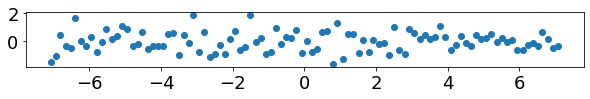

In [8]:
plt.figure(figsize=(10,1))
plt.scatter(coordinates_pca[:, 0], coordinates_pca[:, 1]);

In [9]:
pca.explained_variance_

array([17.26364136,  0.48262843])

In [10]:
pca.explained_variance_ratio_

array([0.97280395, 0.02719605])

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.97280395, 1.        ])

In [12]:
pca.components_[0]

array([-0.49245058, -0.50498006,  0.3603177 , -0.60636919, -0.06392884,
        0.02980316])

# Example 2. Digits (MNIST)

In [24]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [17]:
X, y = load_digits(return_X_y=True)

In [18]:
X.shape

(1797, 64)

In [37]:
y == 0

array([ True, False, False, ..., False, False, False])

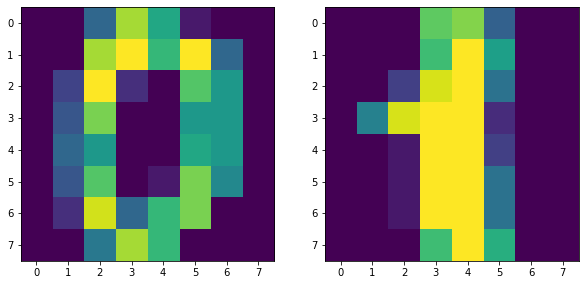

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(X[0].reshape(8,8));
ax[1].imshow(X[1].reshape(8,8));

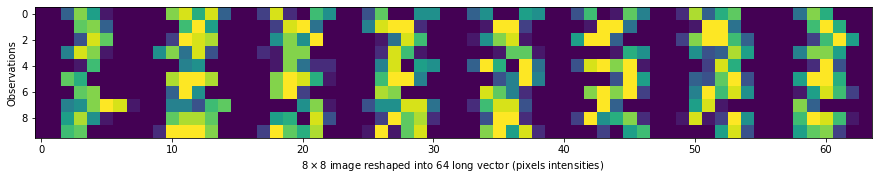

In [20]:
plt.figure(figsize=(15,3))
plt.imshow(X[:10])
plt.xlabel(f'$8 \\times 8$ image reshaped into $64$ long vector (pixels intensities)')
plt.ylabel('Observations');

In [21]:
pca = PCA(64)

pca.fit(X)

PCA(n_components=64)

In [22]:
explained_ratio = pca.explained_variance_ratio_
print(explained_ratio)

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


In [25]:
np.cumsum(explained_ratio)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [89]:
pca = PCA(n_components=64)

pca.fit(X)

X_pca = pca.transform(X)

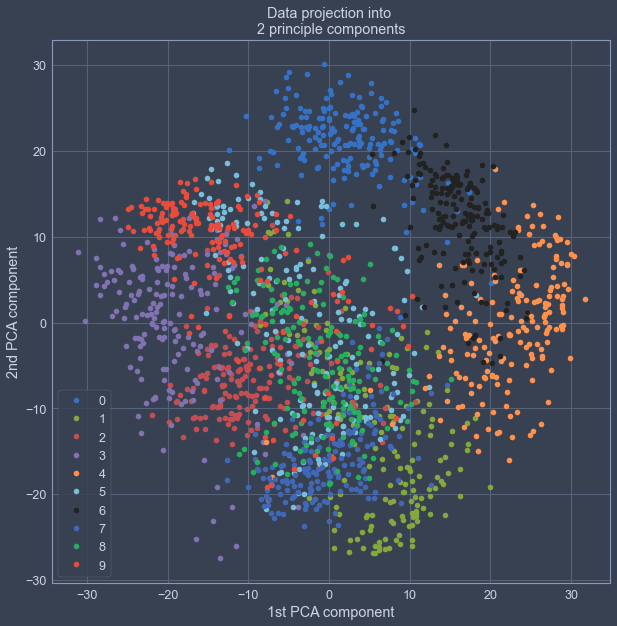

In [90]:
plt.figure(figsize=(10, 10))

for n in range(10):
    plt.plot(X_pca[y == n, 0], X_pca[y == n, 1], 'o', label=f'{n}')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.legend()
plt.title('Data projection into \n2 principle components');

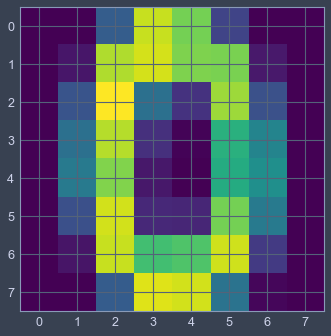

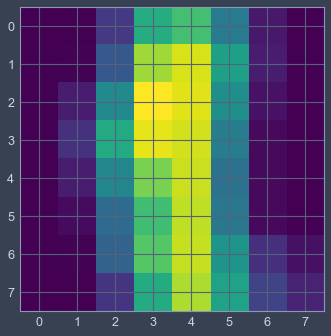

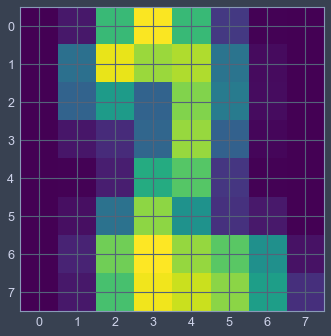

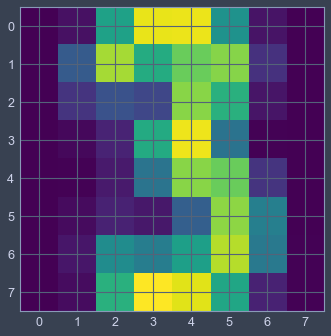

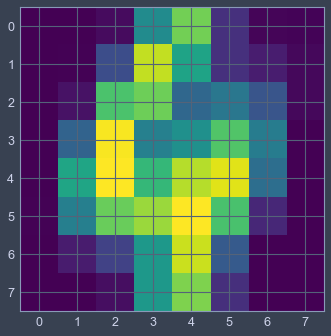

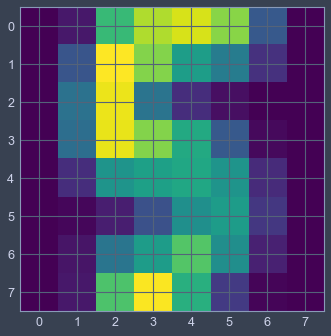

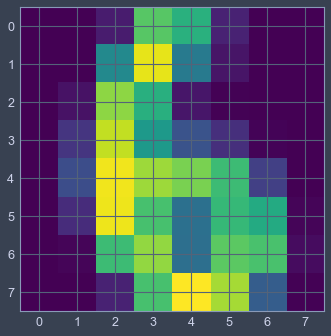

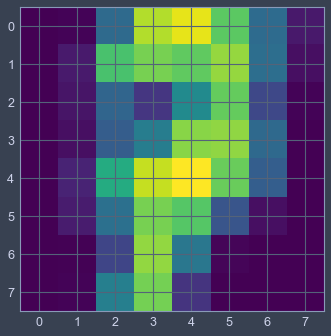

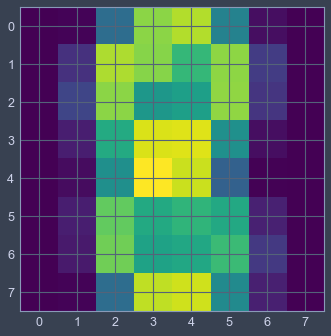

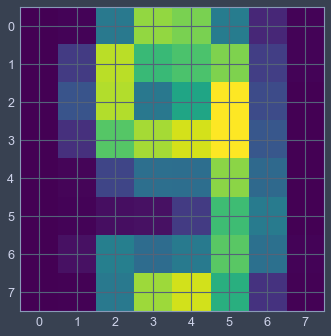

In [91]:
for n in range(10):
    new = np.mean(X_pca[y == n, :], axis=0)
    plt.figure()
    plt.imshow(pca.inverse_transform(new).reshape(8,8));

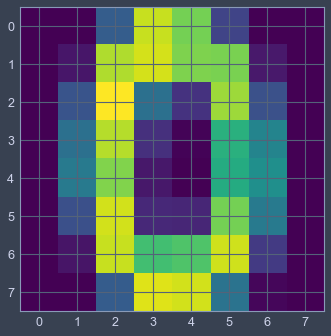

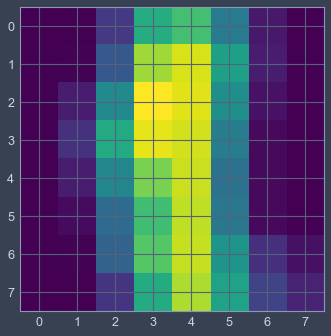

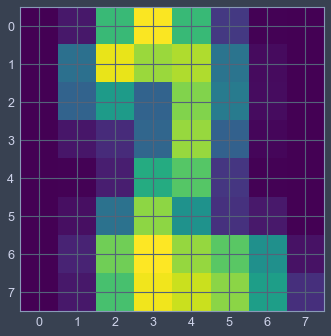

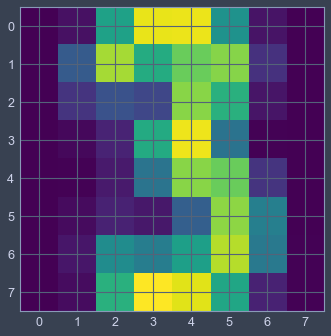

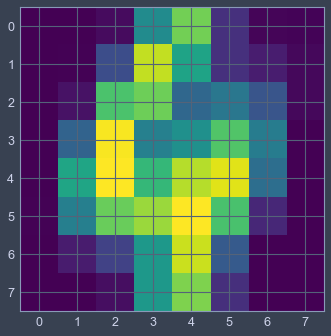

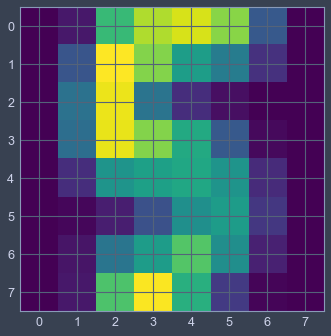

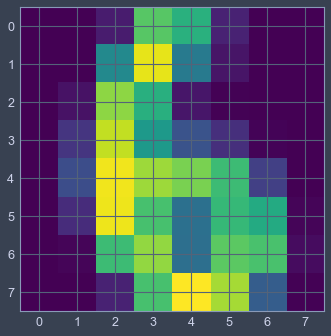

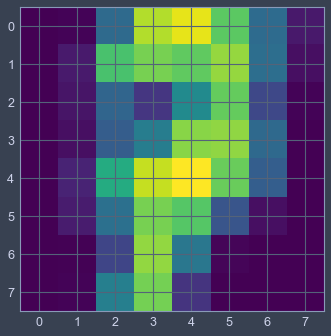

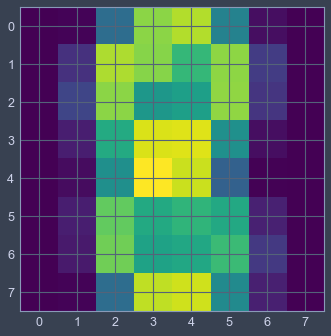

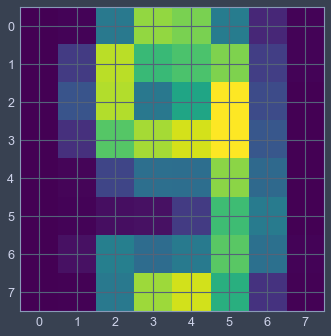

In [92]:
for n in range(10):
    new = np.mean(X[y == n, :], axis=0)
    plt.figure()
    plt.imshow(new.reshape(8,8));

In [98]:
from sklearn.cluster import KMeans
import numpy.linalg as LA

In [103]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
labels = kmeans.labels_

In [104]:
LA.norm(labels - y) / LA.norm(y)

0.7030315245008603

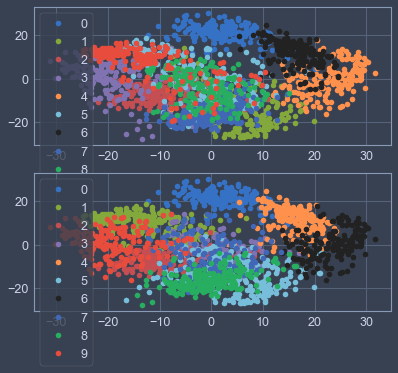

In [107]:
_, ax = plt.subplots(2)
for n in range(10):
    ax[0].plot(X_pca[y == n, 0], X_pca[y == n, 1], 'o', label=f'{n}')
    ax[1].plot(X_pca[labels == n, 0], X_pca[labels == n, 1], 'o', label=f'{n}')
ax[0].legend();
ax[1].legend();

## TSNE example

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(random_state=33)
X_tsne = tsne.fit_transform(X)

In [28]:
X_tsne.shape

(360, 2)

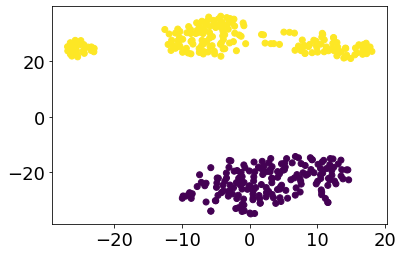

In [29]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

In [30]:
tsne = TSNE(random_state=33)
X_tsne = tsne.fit_transform(X)

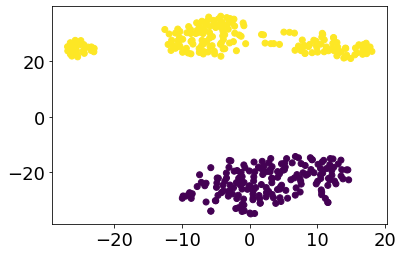

In [31]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

## Real data example (feature importance comparison)

In [32]:
df = pd.read_csv('./intro2ds_2020/seminar_6/gb_generated_features_train.csv')

In [33]:
pca = PCA(5)

pca.fit(df[['#Unique_Department','#Unique_Fineline','#UniqueScanCount','TotalScanCount','total_return']])

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.explained_variance_ratio_

array([0.96781289, 0.0201543 , 0.00725869, 0.00358119, 0.00119292])

In [35]:
print(pca.components_[0])

[0.16412491 0.4712911  0.55564285 0.66498753 0.00056358]


![](https://downloader.disk.yandex.ru/preview/396663ce12499b40d3fce772ccface38aff242f9aa5968fea347a98f57295c6f/5f74928c/uk_d-oV0X9p5qT1aNoQlIQQZLaFJWQVmOY4MJ0mjv4HKcS-4cKdlKPArXCh_UXKN5MY8hrltubYmZHNjmh93ew==?uid=0&filename=feature_importance.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&owner_uid=159868851&size=2048x2048)

# Why reduce the dimensionality?

Some of the reasons

- Reduce the noise
- Visualization purposes
- Data sampling